## Trabajo Final Grupal de Aprendizaje de Máquina I

####     Integrantes:
####     * Pedro Pérez
####     * Bárbara Cocco
####     * Fabian Uribe

### Fuente de datos: https://www.kaggle.com/datasets/starbucks/starbucks-menu

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
#from google.colab import drive
import matplotlib.pyplot as plt
#smimport statsmodels.api as sm
#import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

#drive.mount('/content/drive')

### Fuente de datos: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [2]:
import awswrangler as wr

import mlflow

# Para que funciones, todos nuestros scripts debemos exportar las siguientes variables de entorno
%env AWS_ACCESS_KEY_ID=minio
%env AWS_SECRET_ACCESS_KEY=minio123
%env MLFLOW_S3_ENDPOINT_URL=http://localhost:9000
%env AWS_ENDPOINT_URL_S3=http://localhost:9000

env: AWS_ACCESS_KEY_ID=minio
env: AWS_SECRET_ACCESS_KEY=minio123
env: MLFLOW_S3_ENDPOINT_URL=http://localhost:9000
env: AWS_ENDPOINT_URL_S3=http://localhost:9000


In [5]:
df_rain =  wr.s3.read_csv("s3://data/data_info/weatherAUS.csv", sep=';')
print(df_rain.shape)
df_rain.head()

(145460, 23)


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\awswrangler\s3\_read_text_core.py:115: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df: pd.DataFrame = parser_func(f, **pandas_kwargs)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,4/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,5/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No


## Propuesta de investigación en los datos, citando el porqué de la evaluación y que se pretende encontrar o descubrir con dicha investigación:
CB:
Propuesta:comprender que patron sigue el clima,  y predecir los cambios.
porque?Pude ser muy util para datos cientificos, para la sociedad en general, para anticipar catastrofes.
Que se pretende encontrar:Se desea encontrar tendencias, correlaciones.

## Razón de elección del algoritmo empleado para la resolución del problema y cómo llegó a esa elección por sobre otras opciones
CB: Yo creo que aqui podriamos hacer pruebas con diferentes modelos, y elegir uno, una vez que lo elegimos, ya podemos tener el fundamento de por que lo elegimos por sobre lso otros. Otra ccosa una vez que elegimos el mdoelo mas adecuado, escribir como uan monografia del modelo como para apoyar todos nuestros fundamentos. Somo 3 cada uno podria plicar un modelo y explicar el modelo, como para al final debatir entre los 3



Deberá expresar de manera clara el resultado de la investigación aportando las métricas necesarias para comprender cómo se desempeña el algoritmo elegido.


6-En su cierre debe dar una reflexión de su investigación y proponer nuevos caminos de resolución en el caso que sea necesario.


7-Como última fecha de entrega del trabajo, estará limitado a 7 días posteriores a la última clase.


8-La entrega es por correo electrónico, ya sea el envío de la notebook o el link a repositorio (de GitHub o GitLab) con el trabajo

## Pt 1) Exploratory Data Analysis

In [6]:
df_rain[df_rain.Date > '2013-01-01'].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,82417.000000,82524.000000,81404.000000,47285.000000,43282.00000,77440.000000,82263.000000,81532.000000,81742.000000,80682.000000,74638.000000,51297.000000,49351.000000,82241.000000,81197.000000
mean,12.213572,23.207904,2.395997,5.460577,7.59586,40.047262,14.057365,18.635787,69.061058,51.707618,1017.670550,4.466616,4.519584,16.980027,21.665573
std,6.416840,7.113350,8.667210,4.181891,3.79299,13.665407,8.940579,8.814037,18.894330,20.721321,7.143108,2.885105,2.721787,6.498161,6.929592
min,-8.200000,-3.700000,0.000000,0.000000,0.00000,7.000000,0.000000,0.000000,1.000000,0.000000,982.000000,0.000000,0.000000,-7.000000,-4.200000
25%,7.600000,17.900000,0.000000,2.600000,4.80000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.40000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.300000,0.800000,7.400000,10.60000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.500000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,82.400000,14.50000,135.000000,87.000000,83.000000,100.000000,100.000000,1041.000000,9.000000,8.000000,38.900000,46.100000


### Hipótesis 1: La variable numérica Rainfall tiene correlacción alta con la variable target "RainToday".

### Por tanto, podemos explorar las correlacciones entre otras variables numéricas y Rainfall para entender que features numéricos tienen mayor importancia que otros y así poder descartar los de menor importancia.

### Cabe destacar que no podemos eliminar outliers de esta variable ya que su distribución es de tenedencia muy sesgada al 0 [PENDIENTE DEMOSTRAR]

In [7]:
numeric_columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
corr_numeric_columns = ['Rainfall','Sunshine','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm']
categoric_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm']
date_columns = ['Date']
target_columns = ['RainToday','RainTomorrow']

### Hipótesis 2: Debemos separar las ubicaciones secas de las lluviosas, para la expliración y para el modelo. Veamos entonces el mapa de australia por tendencia climática y las ciudades que tenemos en el dataset.

### Empecemos el análisis mirando las ciudades de las zonas más lluviosas. En este caso, serían las ciudades de la costa.

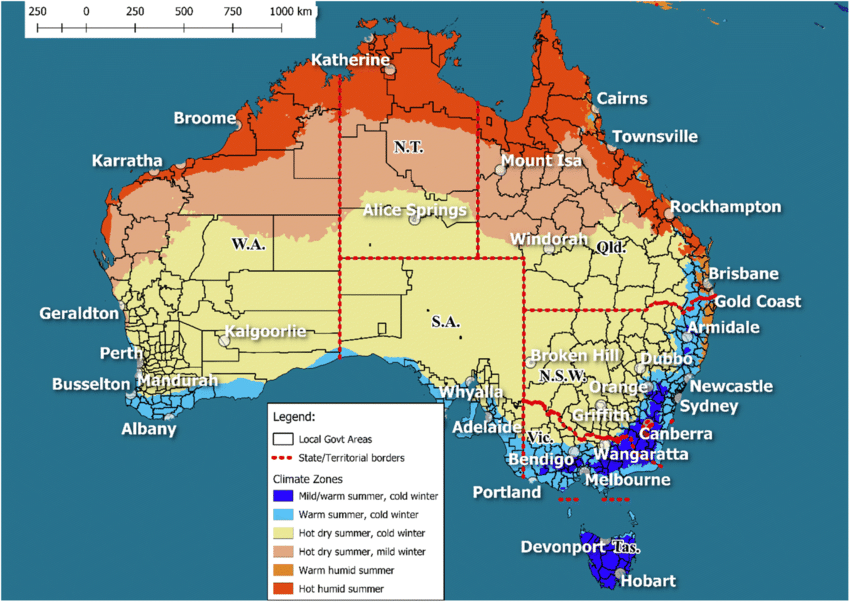

### Ref Img https://www.researchgate.net/publication/335704120/figure/fig1/AS:941575584641026@1601500521778/Climate-zones-major-cities-towns-and-local-government-areas-in-Australia-State-and.png

In [8]:
#wet_cities_map = ['Devonport', 'Hobart', 'Melbourn', 'Portland', 'Bendigo', 'Albany', 'Whyalia', 'Adelaide', 'Wangaratta', 'Canberra', 'Sydney', 'Griffith', 'Newcastle']

wet_mean = df_rain[['Location','Rainfall']].groupby(['Location']).mean().mean().values[0] # Definición de la separación de categoría de ciudades por la media

wet_cities_mean = df_rain[['Location','Rainfall']].groupby(['Location']).mean()[df_rain[['Location','Rainfall']].groupby(['Location']).mean() > wet_mean].dropna().index

df_rain['_Location_type'] = df_rain['Location'].apply(lambda x: 'Wet Location' if x in wet_cities_mean else 'Dry Location')

df_rain['_Location_type'].value_counts()

_Location_type
Dry Location    91849
Wet Location    53611
Name: count, dtype: int64

### Hipótesis 3: Incluso si hay ciudades lluviosas vs cecas, habrá estacionalidad que afectará todas por igual: Por ejemplo, el verano será más seco para todas las ciudades por igual en comparación con primavera y verano. Debemos encontrar comprar las muestras excluyendo data de verano e invierno para comprobar esta hipótesis.

In [9]:
df_rain['_Month'] = pd.DatetimeIndex(df_rain['Date']).month
df_rain['_Month'].value_counts()

_Month
3     12975
5     12967
1     12898
6     12298
8     12158
10    12158
7     12155
11    11787
9     11770
4     11716
12    11583
2     10995
Name: count, dtype: int64

## Observaciones:

*   List item
*   List item





## Pt 2) Feature Engineering

In [10]:
# Seleccionar las columnas de interés
corr_numeric_columns = ['Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']
df = df_rain[corr_numeric_columns]  # Asumo que 'RainToday' es la columna objetivo

# Visualizar los primeros 5 registros
print(df.head())

   Sunshine  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm RainToday
0       NaN         71.0         22.0       8.0       NaN        No
1       NaN         44.0         25.0       NaN       NaN        No
2       NaN         38.0         30.0       NaN       2.0        No
3       NaN         45.0         16.0       NaN       NaN        No
4       NaN         82.0         33.0       7.0       8.0        No


In [11]:
# Contar la cantidad de filas
num_rows = len(df)
print(f'Cantidad de filas: {num_rows}')
#145460

Cantidad de filas: 145460


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Eliminar filas con valores nulos
df = df.dropna()


In [14]:
# Contar la cantidad de filas
num_rows = len(df)
print(f'Cantidad de filas: {num_rows}')
#64350

Cantidad de filas: 64350


In [15]:
# Convertir la columna 'RainToday' a valores numéricos (0 y 1)
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})

In [16]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df.drop('RainToday', axis=1)
y = df['RainToday']

In [17]:
mlflow_server = "http://localhost:5000"
#mlflow_server = "http://192.168.0.21:5000"

mlflow.set_tracking_uri(mlflow_server)

In [18]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Cargamos los datos para realizar nuestro estudio.
# OBS, no vamos a cargar los datos de testing, nada de Data leakage por aquí
#X_train =  wr.s3.read_csv("s3://data/final/train/heart_X_train.csv")
#y_train =  wr.s3.read_csv("s3://data/final/train/heart_y_train.csv")

#X_test =  wr.s3.read_csv("s3://data/final/test/heart_X_test.csv")
#y_test =  wr.s3.read_csv("s3://data/final/test/heart_y_test.csv")


In [19]:
#from plots import plot_correlation_with_target, plot_information_gain_with_target

In [20]:
# Dado que estamos usando como tracking a MLFlow, mostrar los gráficos aquí no tiene sentido.
#correlation_plot = plot_correlation_with_target(X_train, y_train)
#information_gain_plot = plot_information_gain_with_target(X_train, y_train)

In [21]:
import datetime
import optuna

from mlflow.models import infer_signature
from mlflow_aux import get_or_create_experiment

from optuna_aux import champion_callback, objective

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Optuna es un poco verboso, dejamos que solo nos muestre logs de errores
optuna.logging.set_verbosity(optuna.logging.ERROR)

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# Creemos el experimento
experiment_id = get_or_create_experiment("Lluvia")
print(experiment_id)

run_name_parent = "best_hyperparam_"  + datetime.datetime.today().strftime('%Y/%m/%d-%H:%M:%S"')

3


In [23]:
with mlflow.start_run(experiment_id=experiment_id, run_name=run_name_parent, nested=True):
    # Inicializamos el estudio de Optuna
    #study = optuna.create_study(direction="maximize")

    # Ejecutamos los trials de optimización de hiperparametros. Cada uno de estos trials se ejecuta con un run separado, pero
    # está anidado al run padre.
    # Notar la adición del `champion_callback` para controlar qué mensajes mostramos
    # Para entender mejor esto ver la documentación de objective y champion_callback en optuna_aux
    #study.optimize(lambda trial: objective(trial, X_train, y_train, experiment_id), n_trials=250, callbacks=[champion_callback])

    # Una vez que terminamos la búsqueda, guardamos los mejores parámetros en el run padre.
   # mlflow.log_params(study.best_params)
    #mlflow.log_metric("best_train_f1", study.best_value)

    mlflow.set_tags(
        tags={
            "project": "Lluvia",
            "optimizer_engine": "optuna",
            "model_family": "sklearn",
            "feature_set_version": 1,
        }
    )

    # Crear un modelo de Árbol de Decisión
    model = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=42)

    model = model.fit(X_train, y_train.to_numpy().ravel())

    # Y testeamos el modelo y logueamos el resultado
    y_pred = model.predict(X_test)
    f1_score = f1_score(y_test.to_numpy().ravel(), y_pred)
    mlflow.log_metric("test_f1", f1_score)

    # Logueamos los artefactos de las gráficas de correlación y de information_gain
    #mlflow.log_figure(figure=correlation_plot, artifact_file="correlation_plot.png")
    #mlflow.log_figure(figure=information_gain_plot, artifact_file="information_gain_plot.png")

    # Guardamos el artefacto del modelo
    artifact_path = "model"

    signature = infer_signature(X_train, model.predict(X_train))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path=artifact_path,
        signature=signature,
        serialization_format='cloudpickle',
        registered_model_name="Lluvia_model_dev",
        metadata={"model_data_version": 1}
    )

    # Obtenemos la ubicación del modelo guardado en MLFlow
    model_uri = mlflow.get_artifact_uri(artifact_path)


Successfully registered model 'Lluvia_model_dev'.
2024/04/28 18:35:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Lluvia_model_dev, version 1
Created version '1' of model 'Lluvia_model_dev'.


In [24]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [25]:
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
X_test.head()

,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
129952,8.5,59.0,36.0,0.0,7.0
31777,9.8,65.0,38.0,1.0,1.0
140864,11.1,68.0,24.0,6.0,6.0
85448,1.2,98.0,93.0,8.0,8.0
109525,9.3,71.0,39.0,0.0,4.0


In [27]:
y_test

129952    0
31777     0
140864    0
85448     1
109525    0
         ..
76443     1
123171    1
110383    0
70334     0
103188    0
Name: RainToday, Length: 16088, dtype: int64

In [28]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [29]:
# Mostrar el reporte de clasificación
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     12401
           1       0.66      0.33      0.44      3687

    accuracy                           0.81     16088
   macro avg       0.74      0.64      0.66     16088
weighted avg       0.79      0.81      0.78     16088



In [30]:
loaded = mlflow.sklearn.load_model(model_uri)

In [31]:
import numpy as np
test_data = [8.5,59.0,36.0,0.0,7.0]
loaded.predict(np.array(test_data).reshape([1, -1]))

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [32]:
from mlflow import MlflowClient

client = MlflowClient()
name = "Lluvia_model_prod2"
desc = "Determina si llovera o no maniana"

# Creamos el modelo productivo
client.create_registered_model(name=name, description=desc)

# Guardamos como tag los hiper-parametros en la version del modelo
tags = model.get_params()
tags["model"] = type(model).__name__
tags["f1-score"] = f1_score

# Guardamos la version del modelo
result = client.create_model_version(
    name=name,
    source=model_uri,
    run_id=model_uri.split("/")[-3],
    tags=tags
)

# Y creamos como la version con el alias de champion para poder levantarlo en nuestro
# proceso de servicio del modelo on-line.
client.set_registered_model_alias(name, "champion1", result.version)

2024/04/28 18:36:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Lluvia_model_prod2, version 1


In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pickle



# Guardar el modelo en un archivo .pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [35]:
import requests

url = "http://localhost:8800/predict/"

# Example input data
data = {
    "features": {
        "Sunshine": 8.5,
        "Humidity9am": 59.0,
        "Humidity3pm": 36.0,
        "Cloud9am": 0.0,
        "Cloud3pm": 7.0
    }
}

response = requests.post(url, json=data)
print(response.json())


{'detail': [{'type': 'missing', 'loc': ['body', 'features', 'age'], 'msg': 'Field required', 'input': {'Sunshine': 8.5, 'Humidity9am': 59.0, 'Humidity3pm': 36.0, 'Cloud9am': 0.0, 'Cloud3pm': 7.0}}, {'type': 'missing', 'loc': ['body', 'features', 'sex'], 'msg': 'Field required', 'input': {'Sunshine': 8.5, 'Humidity9am': 59.0, 'Humidity3pm': 36.0, 'Cloud9am': 0.0, 'Cloud3pm': 7.0}}, {'type': 'missing', 'loc': ['body', 'features', 'cp'], 'msg': 'Field required', 'input': {'Sunshine': 8.5, 'Humidity9am': 59.0, 'Humidity3pm': 36.0, 'Cloud9am': 0.0, 'Cloud3pm': 7.0}}, {'type': 'missing', 'loc': ['body', 'features', 'trestbps'], 'msg': 'Field required', 'input': {'Sunshine': 8.5, 'Humidity9am': 59.0, 'Humidity3pm': 36.0, 'Cloud9am': 0.0, 'Cloud3pm': 7.0}}, {'type': 'missing', 'loc': ['body', 'features', 'chol'], 'msg': 'Field required', 'input': {'Sunshine': 8.5, 'Humidity9am': 59.0, 'Humidity3pm': 36.0, 'Cloud9am': 0.0, 'Cloud3pm': 7.0}}, {'type': 'missing', 'loc': ['body', 'features', 'fbs'